In [1]:
x = [580, 700, 810, 840]
y = [374, 385, 375, 401]

In [2]:
import numpy as np

x = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])


In [3]:
input_cnt = 1
output_cnt = 1
RND_MEAN = 0
RND_STD = 1

In [4]:
def main_execute(x, y, epoch_count, report, lr = 0.001 ): # epoch가 100번 돌린다 하면 다보는 것도 좋지만 3번째 마다 보여주는것도 좋음
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x, y, epoch_count, report, lr)
    
    return sse_row, theta_0_row, theta_1_row

In [5]:
def model_init():
    global theta_0, theta_1
    theta_1 = np.random.normal(RND_MEAN, RND_STD, [input_cnt, output_cnt])
    theta_0 = np.random.normal(RND_MEAN, RND_STD, [output_cnt])

In [6]:
def forward_neuralnet(input_x):  # 입력값들 받아 예상 y출력
    y_hat = theta_0+theta_1*input_x
    
    return y_hat

In [7]:
def forward_postproc(output, y):
    diff = output - y
    square = np.square(diff)
    sse = 1/2 * (np.sum(square))
    
    return sse

In [8]:
def back_propagation(y_hat, lr): #theta 값들을 갱신해주기때문에 return 값 없음
    global theta_0, theta_1
    theta_0 = theta_0 - lr*(np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr*(np.sum((y_hat - y_label_total) * x))

In [9]:
def run_train(x, y, epoch_count, report, lr):
    print('initial theta_0:{}'.format(theta_0))
    print('initial theta_1:{}'.format(theta_1))
    sse_row = []
    theta_0_row = []
    theta_1_row = []
    
    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)
        sse = forward_postproc(y_hat,y_label_total)
        sse_row.append(sse)
        
        
        back_propagation(y_hat, lr) 
        
        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)
        
        if report > 0 and (epoch)%report == 0:
            print("Epoch - {}".format(epoch+1))
            print("SSE: {}".format(sse))
            
    print("=====================================")
    print('Final SSE :{}'.format(sse))
    
    return sse_row, theta_0_row, theta_1_row
        

In [11]:
sse_row, theta_0_row, theta_1_row = main_execute(x, y_label_total, epoch_count= 30, report = 3, lr=0.0000001)

initial theta_0:[0.85082559]
initial theta_1:[[3.91410167]]
Epoch - 1
SSE: 12653040.661154088
Epoch - 4
SSE: 2879112.227548731
Epoch - 7
SSE: 657808.7446287284
Epoch - 10
SSE: 152977.01827467704
Epoch - 13
SSE: 38244.80173691061
Epoch - 16
SSE: 12169.813013576317
Epoch - 19
SSE: 6243.796144735729
Epoch - 22
SSE: 4897.000584765019
Epoch - 25
SSE: 4590.916578070491
Epoch - 28
SSE: 4521.353251218321
Final SSE :4508.513194962696


In [15]:
import matplotlib.pyplot as plt

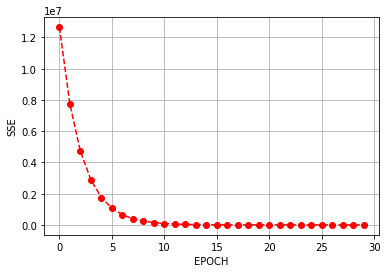

In [14]:
plt.plot(sse_row, '--o', color = 'red')
plt.xlabel("EPOCH")
plt.ylabel("SSE")
plt.grid()
plt.show()

In [ ]:
sse_row

In [7]:
import matplotlib
print(matplotlib.matplotlib_fname())

C:\Users\woosung\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
